Tentu, saya akan menyusun kerangka file `.ipynb` lengkap dengan kode Python dan penjelasan Markdown sesuai permintaan Anda, dengan memperbaiki urutan langkah-langkah prapemrosesan dan mengintegrasikannya ke dalam proses data mining CRISP-DM.

Harap diingat bahwa ini adalah **kerangka**. Anda perlu menjalankan kode ini di lingkungan Jupyter Notebook Anda sendiri dan mungkin perlu menyesuaikan path file, nama kolom (jika ada sedikit perbedaan dalam dataset Anda), dan interpretasi berdasarkan output aktual yang Anda dapatkan.

In [21]:
# Impor pustaka yang diperlukan di awal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Atur beberapa opsi tampilan pandas untuk output yang lebih baik
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Analisis Performa Metode Naive Bayes dan Logistic Regression dalam Deteksi Dini Kanker Serviks

## Business Understanding

### Define the Problem
Kanker serviks merupakan salah satu penyebab utama kematian akibat kanker pada wanita di seluruh dunia, terutama di negara berkembang. [1, 2] Deteksi dini secara signifikan meningkatkan prognosis dan tingkat kelangsungan hidup. [3, 4] Tantangan utama adalah mengidentifikasi individu yang berisiko tinggi secara akurat dan efisien, terutama di daerah dengan sumber daya terbatas. Proyek ini bertujuan untuk mengembangkan dan membandingkan model pembelajaran mesin yang dapat membantu dalam deteksi dini kanker serviks berdasarkan faktor risiko yang diketahui.

#### Urgensi Deteksi Dini Kanker Serviks
Kanker serviks seringkali tidak menunjukkan gejala pada tahap awal, sehingga skrining dan deteksi dini menjadi sangat krusial. [5] Ketika terdeteksi pada stadium lanjut, pengobatan menjadi lebih kompleks dan tingkat keberhasilannya menurun. Program deteksi dini yang efektif dapat mengurangi angka kesakitan dan kematian akibat penyakit ini. [1]

#### Alasan Pemilihan Naive Bayes dan Logistic Regression
*   **Naive Bayes:** Merupakan algoritma klasifikasi probabilistik yang sederhana, cepat, dan seringkali memberikan performa yang baik sebagai *baseline*, terutama pada dataset dengan dimensi yang tidak terlalu besar. Asumsi independensi fiturnya, meskipun seringkali tidak sepenuhnya terpenuhi di dunia nyata, dapat bekerja dengan baik dalam praktiknya. [2]
*   **Regresi Logistik:** Adalah model linear yang mapan untuk masalah klasifikasi biner. Keunggulan utamanya adalah interpretabilitas koefisiennya, yang memungkinkan kita memahami bagaimana setiap faktor risiko berkontribusi terhadap kemungkinan kanker serviks. Ini penting dalam konteks medis untuk memberikan wawasan yang dapat ditindaklanjuti. [2]
Kedua model ini relatif mudah diimplementasikan dan dipahami, menjadikannya pilihan yang baik untuk analisis awal dan perbandingan performa dalam konteks deteksi dini.

### Set Objectives
1.  Mengembangkan model prediksi menggunakan algoritma Naive Bayes untuk deteksi dini kanker serviks.
2.  Mengembangkan model prediksi menggunakan algoritma Regresi Logistik untuk deteksi dini kanker serviks.
3.  Mengevaluasi dan membandingkan performa kedua model berdasarkan metrik yang relevan (misalnya, recall, precision, F1-score, AUC-ROC).
4.  Mengidentifikasi faktor-faktor risiko yang paling signifikan menurut model yang dikembangkan (khususnya dari Regresi Logistik).
5.  Memberikan rekomendasi berdasarkan temuan untuk potensi penggunaan model dalam skrining awal atau sebagai alat bantu keputusan klinis.

### Identify Stakeholders
*   **Tenaga Medis (Dokter, Perawat, Petugas Kesehatan Masyarakat):** Dapat menggunakan model sebagai alat bantu untuk skrining awal, identifikasi pasien berisiko tinggi yang memerlukan pemeriksaan lebih lanjut, dan edukasi pasien.
*   **Pasien:** Mendapatkan manfaat dari potensi deteksi dini yang dapat meningkatkan hasil pengobatan dan kualitas hidup.
*   **Peneliti (Bidang Medis dan Ilmu Data):** Mendapatkan wawasan lebih lanjut mengenai faktor risiko, efektivitas model prediktif, dan area penelitian selanjutnya.
*   **Pembuat Kebijakan Kesehatan & Institusi Kesehatan:** Dapat menggunakan hasil penelitian untuk merancang program skrining yang lebih efektif, alokasi sumber daya yang lebih baik, dan kebijakan kesehatan masyarakat terkait pencegahan kanker serviks.

### Define Success Criteria
Keberhasilan proyek akan diukur berdasarkan kriteria berikut, dengan penekanan pada aspek klinis deteksi dini:
*   **Recall (Sensitivitas) Model:** Target utama adalah mencapai recall **minimal 80%** untuk kelas positif (kanker serviks). Ini sangat penting untuk meminimalkan kasus *false negative* (pasien dengan kanker tidak terdeteksi), karena konsekuensi dari diagnosis yang terlewat sangat serius. [2]
*   **AUC-ROC (Area Under the Receiver Operating Characteristic Curve):** Target AUC-ROC **minimal 0.75**, yang menunjukkan kemampuan model yang baik dalam membedakan antara pasien dengan dan tanpa kanker serviks di berbagai ambang batas klasifikasi.
*   **Precision:** Meskipun recall adalah prioritas, precision yang memadai (misalnya, >50-60%) juga penting untuk mengurangi jumlah *false positive* (pasien sehat diprediksi kanker) yang dapat menyebabkan kecemasan, biaya tes lanjutan yang tidak perlu, dan beban pada sistem kesehatan.
*   **F1-Score:** Sebagai ukuran keseimbangan antara recall dan precision, memberikan gambaran performa model secara keseluruhan.
*   **Interpretability:** Kemampuan untuk menginterpretasikan faktor-faktor yang mempengaruhi prediksi model, terutama dari Regresi Logistik, untuk memberikan wawasan klinis yang berguna.

## Data Understanding

### Collect Data
Dataset yang digunakan adalah "Cervical Cancer (Risk Factors) Data Set" dari UCI Machine Learning Repository. Dataset ini dikumpulkan di 'Hospital Universitario de Caracas' di Caracas, Venezuela. Dataset ini mencakup informasi demografi, kebiasaan (seperti merokok), riwayat medis (termasuk riwayat kontrasepsi dan Penyakit Menular Seksual/PMS), serta hasil dari berbagai tes diagnostik untuk kanker serviks. [1, 2] Dataset ini umumnya memiliki sekitar 858 sampel dan 36 fitur. [2] Untuk analisis ini, kita akan mengasumsikan data disimpan dalam file CSV bernama `risk_factors_cervical_cancer.csv`.

In [22]:
# Muat dataset
try:
    df_raw = pd.read_excel('KK/cervical-cancer.xlsx')
    print("Dataset berhasil dimuat.")
    print(f"Jumlah baris awal: {df_raw.shape}, Jumlah kolom awal: {df_raw.shape[1]}")
except FileNotFoundError:
    print("File dataset 'KK/cervical-cancer.xlsx' tidak ditemukan. Pastikan path file benar.")
    df_raw = pd.DataFrame()

Dataset berhasil dimuat.
Jumlah baris awal: (835, 36), Jumlah kolom awal: 36


### Describe Data
Langkah ini melibatkan pemahaman awal terhadap struktur dan isi dataset. Kita akan melihat tipe data setiap kolom, jumlah entri, dan statistik deskriptif dasar.

In [23]:
if not df_raw.empty:
    print("\nInformasi Dataset Awal:")
    df_raw.info()

    # Ganti '?' dengan NaN untuk analisis statistik yang benar
    df_desc = df_raw.replace('?', np.nan)

    # Konversi kolom yang seharusnya numerik ke tipe numerik sebelum describe
    # Ini adalah langkah awal, konversi lebih formal akan dilakukan di Data Preparation
    for col in df_desc.columns:
        df_desc[col] = pd.to_numeric(df_desc[col], errors='ignore')

    print("\nStatistik Deskriptif (untuk kolom numerik setelah konversi awal '?' ke NaN):")
    print(df_desc.select_dtypes(include=np.number).describe().T) #.T untuk transpose agar lebih mudah dibaca

    # print("\nStatistik Deskriptif (untuk kolom objek/kategorikal):")
    # print(df_desc.select_dtypes(include='object').describe().T)

    print("\nBeberapa baris pertama dataset:")
    print(df_raw.head())
else:
    print("Dataset kosong, tidak dapat menampilkan deskripsi data.")


Informasi Dataset Awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                

#### Pengamatan Awal dari Deskripsi Data:
*   Banyak kolom memiliki tipe data `object` karena adanya karakter '?' yang digunakan untuk menandai *missing values*. Ini perlu dikonversi ke `np.nan` dan kemudian ke tipe numerik yang sesuai.
*   Terdapat perbedaan signifikan dalam `count` antar kolom, yang mengindikasikan adanya *missing values* dalam jumlah yang bervariasi.
*   Statistik deskriptif (mean, std, min, max, kuartil) untuk kolom numerik akan memberikan gambaran tentang rentang nilai dan sebaran data. Untuk kolom kategorikal, akan ditampilkan nilai unik, modus (top), dan frekuensi modus (freq).

### Explore Data
Eksplorasi Data Analitik (EDA) dilakukan untuk mengidentifikasi pola, tren, anomali, dan hubungan antar variabel. Visualisasi adalah alat yang ampuh dalam tahap ini. [1]

#### Distribusi Kelas Target (`Biopsy`)
Variabel target dalam banyak studi yang menggunakan dataset ini adalah `Biopsy`, yang menunjukkan hasil biopsi (0 = negatif/normal, 1 = positif/abnormal). [6, 4, 7] Biopsi dianggap sebagai *gold standard* untuk diagnosis definitif. [8, 9, 10, 11, 12] Penting untuk memeriksa distribusi kelas ini karena ketidakseimbangan kelas adalah masalah umum dalam dataset medis dan dapat mempengaruhi performa model. [2, 13]

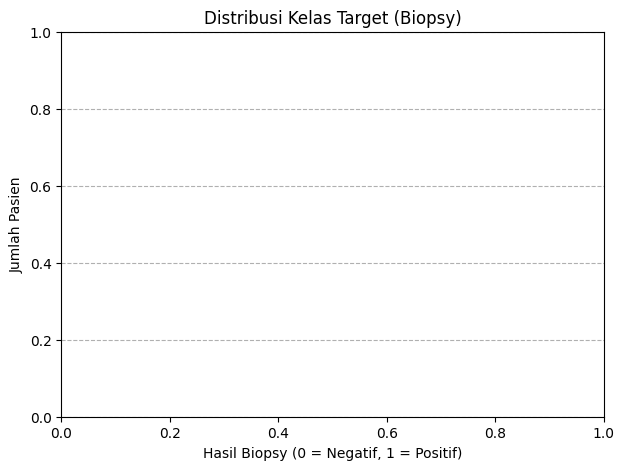

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
if not df_raw.empty and 'Biopsy' in df_raw.columns:
    # Buat salinan untuk eksplorasi agar tidak mengubah df_raw secara langsung di tahap ini
    df_explore = df_raw.copy()
    df_explore.replace('?', np.nan, inplace=True) # Ganti '?' dengan NaN
    df_explore = pd.to_numeric(df_explore, errors='coerce')

    plt.figure(figsize=(7, 5))
    sns.countplot(x='Biopsy', data=df_explore.dropna(subset=)) # Drop NaN di Biopsy untuk countplot
    plt.title('Distribusi Kelas Target (Biopsy)')
    plt.xlabel('Hasil Biopsy (0 = Negatif, 1 = Positif)')
    plt.ylabel('Jumlah Pasien')
    plt.grid(axis='y', linestyle='--')
    plt.show()

    if not df_explore.isnull().all():
        biopsy_counts = df_explore.value_counts()
        biopsy_percentage = df_explore.value_counts(normalize=True) * 100
        print("\nJumlah dan Persentase Distribusi Kelas Target (Biopsy):")
        print(pd.DataFrame({'Jumlah': biopsy_counts, 'Persentase (%)': biopsy_percentage}))
        if len(biopsy_counts) > 1:
            ratio = biopsy_counts.max() / biopsy_counts.min()
            print(f"Rasio kelas mayoritas terhadap minoritas: {ratio:.2f}:1")
            if ratio > 5: # Ambang batas umum untuk ketidakseimbangan signifikan
                 print("Peringatan: Terdeteksi ketidakseimbangan kelas yang signifikan pada variabel target 'Biopsy'.")
    else:
        print("Kolom 'Biopsy' hanya berisi nilai null setelah konversi, tidak dapat menampilkan distribusi.")
else:
    print("Dataset kosong atau kolom 'Biopsy' tidak ditemukan dalam df_raw.")

#### Visualisasi Distribusi Fitur Numerik Penting
Histogram atau density plot dapat digunakan untuk melihat distribusi fitur-fitur numerik yang dianggap sebagai faktor risiko penting, seperti `Age`, `Number of sexual partners`, `First sexual intercourse`, `Num of pregnancies`, `Smokes (years)`, `Hormonal Contraceptives (years)`.

In [ ]:
if not df_raw.empty:
    df_explore_num = df_raw.copy()
    df_explore_num.replace('?', np.nan, inplace=True)

    numerical_features_to_plot =

    fig, axes = plt.subplots(nrows=(len(numerical_features_to_plot) + 1) // 2, ncols=2, figsize=(15, 5 * ((len(numerical_features_to_plot) + 1) // 2)))
    axes = axes.flatten() # Ratakan array axes untuk iterasi yang mudah

    for i, col in enumerate(numerical_features_to_plot):
        if col in df_explore_num.columns:
            df_explore_num[col] = pd.to_numeric(df_explore_num[col], errors='coerce')
            if not df_explore_num[col].isnull().all():
                sns.histplot(df_explore_num[col].dropna(), kde=True, ax=axes[i], bins=20)
                axes[i].set_title(f'Distribusi {col}', fontsize=10)
                axes[i].set_xlabel(col, fontsize=8)
                axes[i].set_ylabel('Frekuensi', fontsize=8)
            else:
                axes[i].set_title(f'{col} (semua NaN)', fontsize=10)
                axes[i].axis('off') # Sembunyikan plot jika semua NaN
        else:
            axes[i].set_title(f'{col} (tidak ditemukan)', fontsize=10)
            axes[i].axis('off') # Sembunyikan plot jika kolom tidak ada

    # Sembunyikan axes yang tidak terpakai jika jumlah fitur ganjil
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("Dataset kosong, tidak dapat melakukan visualisasi distribusi fitur numerik.")

#### Matriks Korelasi Antar Fitur Numerik
Heatmap dari matriks korelasi dapat membantu mengidentifikasi hubungan linear antar fitur numerik. Ini penting untuk memahami potensi multikolinearitas yang dapat mempengaruhi model seperti Regresi Logistik.

In [ ]:
if not df_raw.empty:
    df_corr_explore = df_raw.copy()
    df_corr_explore.replace('?', np.nan, inplace=True)

    # Konversi semua kolom yang mungkin numerik ke tipe numerik
    for col in df_corr_explore.columns:
        df_corr_explore[col] = pd.to_numeric(df_corr_explore[col], errors='ignore')

    numerical_df_explore = df_corr_explore.select_dtypes(include=np.number)

    if not numerical_df_explore.empty and len(numerical_df_explore.columns) > 1:
        plt.figure(figsize=(22, 18)) # Ukuran disesuaikan agar nama kolom terbaca
        correlation_matrix = numerical_df_explore.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
        plt.title('Matriks Korelasi Fitur Numerik', fontsize=16)
        plt.xticks(rotation=45, ha='right', fontsize=9)
        plt.yticks(fontsize=9)
        plt.tight_layout()
        plt.show()
    else:
        print("Tidak cukup kolom numerik yang valid untuk membuat matriks korelasi.")
else:
    print("Dataset kosong, tidak dapat membuat matriks korelasi.")

### Verify Data Quality
Tahap ini fokus pada identifikasi dan kuantifikasi masalah kualitas data, terutama *missing values*. Outlier juga bisa diperiksa, namun penanganannya memerlukan analisis domain yang lebih dalam.

#### Identifikasi dan Kuantifikasi Missing Values
Karakter '?' sering digunakan untuk menandai *missing values* dalam dataset ini dan perlu diganti dengan `np.nan` untuk analisis yang tepat. [14]

In [ ]:
if not df_raw.empty:
    df_quality_check = df_raw.copy()
    df_quality_check.replace('?', np.nan, inplace=True)

    missing_values_count = df_quality_check.isnull().sum()
    missing_percentage = (df_quality_check.isnull().sum() / len(df_quality_check)) * 100
    missing_info_df = pd.DataFrame({
        'Nama Kolom': df_quality_check.columns,
        'Jumlah Missing': missing_values_count,
        'Persentase Missing (%)': missing_percentage
    })
    missing_info_df = missing_info_df[missing_info_df['Jumlah Missing'] > 0].sort_values(by='Persentase Missing (%)', ascending=False)

    print("\nInformasi Kualitas Data - Missing Values:")
    if not missing_info_df.empty:
        print(missing_info_df)

        # Visualisasi missing values
        plt.figure(figsize=(15, 8)) # Ukuran disesuaikan
        sns.barplot(x='Persentase Missing (%)', y='Nama Kolom', data=missing_info_df, palette='viridis')
        plt.title('Persentase Missing Values per Kolom (yang memiliki missing values)', fontsize=14)
        plt.xlabel('Persentase Missing (%)', fontsize=12)
        plt.ylabel('Nama Kolom', fontsize=12)
        plt.grid(axis='x', linestyle='--')
        plt.tight_layout()
        plt.show()
    else:
        print("Tidak ada missing values yang terdeteksi dalam dataset (setelah '?' diganti NaN).")
else:
    print("Dataset kosong, tidak dapat memverifikasi kualitas data.")

#### Pengamatan Kualitas Data (Missing Values):
*   Kolom seperti `STDs: Time since first diagnosis` dan `STDs: Time since last diagnosis` secara konsisten dilaporkan memiliki persentase *missing values* yang sangat tinggi (seringkali >90%). [2, 9, 14] Ini membuat mereka kandidat kuat untuk dihapus.
*   Beberapa kolom lain terkait STDs, penggunaan kontrasepsi, dan kebiasaan merokok juga menunjukkan adanya *missing values* dengan persentase yang bervariasi, yang memerlukan strategi imputasi. [2]
*   Kolom target `Biopsy` dan fitur diagnostik lainnya (`Hinselmann`, `Schiller`, `Citology`) biasanya memiliki sedikit atau tidak ada *missing values*. Jika ada, baris dengan *missing value* pada target mungkin perlu dihapus.

## Data Preparation
Tahap ini sangat krusial dan melibatkan pembersihan, transformasi, dan pengurangan data agar siap untuk pemodelan. **Urutan operasi di sini sangat penting untuk menghindari *data leakage*.**python
# Buat salinan df_raw untuk tahap persiapan data agar df_raw tetap asli
if not df_raw.empty:
    df = df_raw.copy()
else:
    df = pd.DataFrame() # Jika df_raw kosong
```

### Data Cleaning

#### Penggantian Karakter '?' dengan NaN dan Konversi Tipe Data Awal
Langkah pertama adalah mengganti placeholder *missing value* ('?') dengan `np.nan` dan mencoba mengkonversi kolom ke tipe data numerik yang sesuai.

In [ ]:
if not df.empty:
    df.replace('?', np.nan, inplace=True)
    print("\nKarakter '?' telah diganti dengan NaN.")

    # Konversi semua kolom ke numerik, mengabaikan error untuk kolom yang memang non-numerik
    # Ini akan membantu dalam imputasi dan scaling nanti
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') # errors='coerce' akan mengubah non-convertible menjadi NaN

    print("\nTipe data setelah konversi awal ke numerik (errors='coerce'):")
    df.info()
else:
    print("Dataset kosong, tidak dapat melakukan pembersihan data.")

#### Pemilihan Fitur Awal dan Penghapusan Kolom
Berdasarkan tujuan "deteksi dini" dan menggunakan `Biopsy` sebagai *gold standard*:
1.  **Hapus Kolom Diagnostik Lanjutan:** Kolom `Hinselmann`, `Schiller`, dan `Citology` adalah hasil tes yang biasanya dilakukan *setelah* ada kecurigaan awal atau sebagai bagian dari proses diagnostik lanjutan, bukan pada tahap skrining awal berbasis faktor risiko. Memasukkannya akan menyebabkan *temporal data leakage*. [8, 10]
2.  **Hapus Kolom Diagnosis Klinis Selain Biopsy (jika Biopsy adalah target):** Kolom `Dx:Cancer`, `Dx:CIN`, `Dx:HPV`, dan `Dx` adalah diagnosis klinis yang mungkin berkorelasi tinggi dengan `Biopsy` atau merupakan kesimpulan sebelum hasil biopsi definitif. Jika `Biopsy` adalah target, mempertahankan ini bisa menjadi *leakage*. [4, 9, 15, 16] Kolom `Dx` sendiri adalah komposit dari `Dx:Cancer`, `Dx:CIN`, dan `Dx:HPV`. [4]
3.  **Hapus Kolom dengan Missing Values Sangat Tinggi:** Kolom `STDs: Time since first diagnosis` dan `STDs: Time since last diagnosis` memiliki >90% *missing values* dan kurang relevan untuk deteksi dini. [2, 9, 14]

In [ ]:
if not df.empty:
    columns_to_drop_leakage_and_dx =
    columns_to_drop_high_missing =

    # Gabungkan semua kolom yang akan dihapus
    all_columns_to_drop =
    for col_list in [columns_to_drop_leakage_and_dx, columns_to_drop_high_missing]:
        for col_name in col_list:
            if col_name in df.columns:
                all_columns_to_drop.append(col_name)
            # else:
                # print(f"Peringatan: Kolom '{col_name}' untuk dihapus tidak ditemukan dalam dataframe.")

    # Pastikan kolom target 'Biopsy' tidak ikut terhapus jika ada di daftar drop secara tidak sengaja
    if 'Biopsy' in all_columns_to_drop:
        all_columns_to_drop.remove('Biopsy')

    # Hapus duplikat dari daftar kolom yang akan dihapus (jika ada)
    all_columns_to_drop = list(set(all_columns_to_drop))

    df.drop(columns=all_columns_to_drop, inplace=True, errors='ignore')

    print(f"\nDataset setelah menghapus kolom untuk mencegah leakage dan kolom dengan missing values tinggi.")
    print(f"Jumlah kolom tersisa: {df.shape[1]}")
    print("Kolom yang tersisa:", df.columns.tolist())

    # Penanganan Missing Values pada Kolom Target ('Biopsy')
    # Jika ada missing values di kolom target, baris tersebut tidak dapat digunakan untuk training/testing.
    if 'Biopsy' in df.columns:
        if df.isnull().any():
            num_missing_biopsy = df.isnull().sum()
            print(f"\nPeringatan: Terdapat {num_missing_biopsy} missing values di kolom target 'Biopsy'.")
            print("Baris-baris dengan missing value pada 'Biopsy' akan dihapus.")
            df.dropna(subset=, inplace=True)
            print(f"Jumlah baris setelah menghapus NaN di 'Biopsy': {df.shape}")
        # Pastikan Biopsy adalah integer
        df = df.astype(int)
    else:
        print("Peringatan Kritis: Kolom target 'Biopsy' tidak ditemukan setelah penghapusan kolom. Proses tidak dapat dilanjutkan.")
        # Hentikan atau tangani error ini karena target tidak ada
else:
    print("Dataset awal (df) kosong, tidak ada operasi penghapusan kolom yang dilakukan.")

### Pemisahan Data (Train-Test Split)
**Ini adalah langkah pertama yang sangat penting dalam fase persiapan sebelum transformasi data lainnya (imputasi, SMOTE, scaling) untuk mencegah *data leakage*.** Kita akan memisahkan data menjadi set pelatihan (misalnya, 80%) dan set pengujian (misalnya, 20%). Stratifikasi berdasarkan variabel target (`Biopsy`) penting untuk memastikan proporsi kelas yang sama di kedua set, terutama karena adanya ketidakseimbangan kelas.

In [ ]:
X_train, X_test, y_train, y_test = pd.DataFrame(), pd.DataFrame(), pd.Series(dtype='int'), pd.Series(dtype='int') # Inisialisasi

if not df.empty and 'Biopsy' in df.columns and not df.isnull().all():
    X = df.drop('Biopsy', axis=1)
    y = df # y sudah dipastikan integer sebelumnya

    # Lakukan pemisahan data
    # Menggunakan test_size=0.2 untuk 80% training, 20% testing
    # random_state untuk reproduktifitas
    # stratify=y untuk menjaga proporsi kelas target di kedua set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("\nDimensi data setelah pemisahan (train-test split):")
    print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

    print("\nDistribusi kelas target di y_train (setelah split):")
    print(y_train.value_counts(normalize=True) * 100)
    print("\nDistribusi kelas target di y_test (setelah split):")
    print(y_test.value_counts(normalize=True) * 100)
else:
    print("Dataset kosong, kolom 'Biopsy' tidak ada, atau 'Biopsy' hanya berisi NaN. Pemisahan data tidak dapat dilakukan.")

### Menangani Missing Values (Imputasi) pada Fitur
Setelah data dipisah, kita akan menangani *missing values* yang tersisa pada fitur-fitur di `X_train` dan `X_test`.
*   **Parameter Imputasi (misalnya, median) dihitung HANYA dari `X_train`.**
*   Imputer yang sudah di-*fit* kemudian digunakan untuk mentransformasi `X_train` dan `X_test` (menggunakan parameter dari `X_train`).
*   Median digunakan untuk fitur numerik karena lebih robust terhadap outlier dibandingkan mean. [17, 13]

In [ ]:
if not X_train.empty:
    # Semua kolom fitur yang tersisa diasumsikan numerik setelah konversi awal
    # Jika ada kolom kategorikal yang ingin diimputasi dengan modus, perlu penanganan terpisah
    numerical_cols_in_X_train = X_train.columns # Semua kolom di X_train adalah fitur

    # Buat imputer untuk nilai median
    median_imputer = SimpleImputer(strategy='median')

    # Fit imputer HANYA pada X_train (data fitur training)
    median_imputer.fit(X_train[numerical_cols_in_X_train])

    # Transform X_train
    X_train_imputed_array = median_imputer.transform(X_train[numerical_cols_in_X_train])
    X_train_imputed = pd.DataFrame(X_train_imputed_array, columns=numerical_cols_in_X_train, index=X_train.index)

    # Transform X_test menggunakan imputer yang sudah di-fit pada X_train
    if not X_test.empty:
        X_test_imputed_array = median_imputer.transform(X_test[numerical_cols_in_X_train])
        X_test_imputed = pd.DataFrame(X_test_imputed_array, columns=numerical_cols_in_X_train, index=X_test.index)
    else:
        X_test_imputed = pd.DataFrame(columns=numerical_cols_in_X_train) # Buat df kosong jika X_test kosong

    print("\nMissing values di X_train setelah imputasi median:", X_train_imputed.isnull().sum().sum())
    if not X_test_imputed.empty:
        print("Missing values di X_test setelah imputasi median:", X_test_imputed.isnull().sum().sum())
    else:
        print("X_test kosong atau tidak ada fitur numerik, tidak ada imputasi yang dilakukan pada X_test.")
else:
    print("X_train kosong, tidak dapat melakukan imputasi.")
    X_train_imputed = pd.DataFrame()
    X_test_imputed = pd.DataFrame()

### Data Transformation Lanjutan

#### Penskalaan Fitur (Feature Scaling)
Regresi Logistik sensitif terhadap skala fitur. Naive Bayes (GaussianNB) secara teoritis tidak memerlukannya jika fitur berdistribusi normal, tetapi penskalaan tidak akan merugikan dan memastikan perbandingan yang adil antara kedua model. Kita akan menggunakan `StandardScaler` (Z-score normalization) yang mengubah data sehingga memiliki mean 0 dan standar deviasi 1. [2, 7]
*   **Scaler di-*fit* HANYA pada `X_train_imputed`.**
*   Scaler yang sudah di-*fit* kemudian digunakan untuk mentransformasi `X_train_imputed` dan `X_test_imputed`.

In [ ]:
X_train_scaled = pd.DataFrame() # Inisialisasi
X_test_scaled = pd.DataFrame()  # Inisialisasi

if not X_train_imputed.empty:
    scaler = StandardScaler()

    # Fit scaler HANYA pada X_train_imputed (data fitur training yang sudah diimputasi)
    scaler.fit(X_train_imputed)

    # Transform X_train_imputed
    X_train_scaled_array = scaler.transform(X_train_imputed)
    X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=X_train_imputed.columns, index=X_train_imputed.index)

    # Transform X_test_imputed menggunakan scaler yang sudah di-fit pada X_train_imputed
    if not X_test_imputed.empty:
        X_test_scaled_array = scaler.transform(X_test_imputed)
        X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=X_test_imputed.columns, index=X_test_imputed.index)
        print("\nBeberapa baris pertama X_train setelah penskalaan (X_train_scaled):")
        print(X_train_scaled.head())
    else:
        print("X_test_imputed kosong, tidak ada penskalaan yang dilakukan pada X_test.")
else:
    print("X_train_imputed kosong, tidak dapat melakukan penskalaan fitur.")

#### Penanganan Ketidakseimbangan Kelas (SMOTE)
Dataset ini diketahui tidak seimbang, di mana jumlah kasus non-kanker jauh lebih banyak daripada kasus kanker. [2, 13] Untuk mengatasi ini, kita akan menggunakan SMOTE (Synthetic Minority Over-sampling Technique) yang bertujuan untuk menyeimbangkan distribusi kelas dengan membuat sampel sintetis untuk kelas minoritas.
*   **SMOTE diterapkan HANYA pada data training yang sudah diproses (`X_train_scaled` dan `y_train`).** Data testing (`X_test_scaled`, `y_test`) harus tetap tidak seimbang untuk mencerminkan kondisi dunia nyata saat evaluasi model.

In [ ]:
X_train_resampled = X_train_scaled.copy() # Inisialisasi dengan data sebelum SMOTE
y_train_resampled = y_train.copy()

if not X_train_scaled.empty and not y_train.empty:
    print("\nDistribusi kelas target di y_train SEBELUM SMOTE:")
    print(y_train.value_counts(normalize=True) * 100)

    # Cek apakah ada kelas minoritas yang cukup untuk SMOTE
    if y_train.value_counts().min() > 1 : # SMOTE butuh lebih dari 1 sampel di kelas minoritas, idealnya lebih
        smote = SMOTE(random_state=42, k_neighbors=min(5, y_train.value_counts().min() -1) if y_train.value_counts().min() > 1 else 1)
        try:
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

            print("\nDimensi data training setelah SMOTE:")
            print(f"X_train_resampled: {X_train_resampled.shape}, y_train_resampled: {y_train_resampled.shape}")

            print("\nDistribusi kelas target di y_train_resampled SETELAH SMOTE:")
            print(pd.Series(y_train_resampled).value_counts(normalize=True) * 100)
        except ValueError as e:
            print(f"Error saat menerapkan SMOTE: {e}. Mungkin jumlah sampel kelas minoritas terlalu kecil.")
            print("Melanjutkan tanpa SMOTE pada data training.")
            X_train_resampled = X_train_scaled # Kembali ke data sebelum SMOTE jika error
            y_train_resampled = y_train
    else:
        print("Jumlah sampel kelas minoritas di y_train tidak cukup untuk SMOTE. Melanjutkan tanpa SMOTE.")
        X_train_resampled = X_train_scaled
        y_train_resampled = y_train
else:
    print("X_train_scaled atau y_train kosong, tidak dapat menerapkan SMOTE.")

### Data Integration
Untuk proyek ini, kita menggunakan satu dataset tunggal, sehingga tahap integrasi data dari berbagai sumber tidak diperlukan secara eksplisit.

### Data Reduction
Penghapusan kolom dengan *missing values* tinggi dan kolom yang berpotensi menyebabkan *data leakage* telah dilakukan pada tahap *Data Cleaning* dan *Pemilihan Fitur Awal*. Teknik reduksi dimensi lebih lanjut seperti PCA (Principal Component Analysis) bisa dipertimbangkan jika jumlah fitur masih sangat banyak dan ada indikasi multikolinearitas yang tinggi. [5, 13] Namun, untuk perbandingan Naive Bayes dan Regresi Logistik dengan jumlah fitur yang sudah relatif berkurang ini, kita akan melanjutkan tanpa PCA untuk menjaga interpretabilitas fitur asli.

## Modeling

### Select Modeling Techniques
Kita akan menggunakan dua algoritma klasifikasi yang umum dan relatif sederhana namun efektif untuk *baseline*:
1.  **Naive Bayes (GaussianNB):** Model probabilistik yang mengasumsikan independensi antar fitur. Karena fitur kita kontinu setelah penskalaan, GaussianNB adalah pilihan yang sesuai. [2]
2.  **Regresi Logistik (Logistic Regression):** Model linear yang memprediksi probabilitas kelas target. Koefisiennya dapat diinterpretasikan untuk memahami pengaruh masing-masing fitur terhadap prediksi. [2]

### Build Models
Model akan dilatih menggunakan data training yang sudah diproses secara lengkap (`X_train_resampled`, `y_train_resampled`).

#### Model 1: Gaussian Naive Bayes

In [ ]:
gnb_model = None # Inisialisasi

if not X_train_resampled.empty and not pd.Series(y_train_resampled).empty:
    gnb_model = GaussianNB()
    gnb_model.fit(X_train_resampled, y_train_resampled)
    print("Model Gaussian Naive Bayes berhasil dilatih.")
else:
    print("Data training (X_train_resampled atau y_train_resampled) kosong, model Naive Bayes tidak dapat dilatih.")

#### Model 2: Regresi Logistik

In [ ]:
logreg_model = None # Inisialisasi

if not X_train_resampled.empty and not pd.Series(y_train_resampled).empty:
    # Menggunakan solver 'liblinear' yang baik untuk dataset kecil dan masalah biner.
    # 'C' adalah parameter regularisasi invers; nilai lebih kecil berarti regularisasi lebih kuat.
    # 'class_weight' bisa diatur ke 'balanced' jika tidak menggunakan SMOTE,
    # tapi karena kita sudah menggunakan SMOTE, kita bisa biarkan default atau tune 'C'.
    logreg_model = LogisticRegression(random_state=42, solver='liblinear', C=1.0)
    logreg_model.fit(X_train_resampled, y_train_resampled)
    print("Model Regresi Logistik berhasil dilatih.")
else:
    print("Data training (X_train_resampled atau y_train_resampled) kosong, model Regresi Logistik tidak dapat dilatih.")

### Tune Models
*Hyperparameter tuning* bertujuan untuk menemukan kombinasi parameter model yang memberikan performa terbaik pada data validasi (atau melalui *cross-validation* pada data training).

*   **Gaussian Naive Bayes:** Umumnya tidak memiliki banyak hyperparameter yang signifikan untuk di-tune selain `var_smoothing` (parameter untuk stabilitas numerik). Kita akan menggunakan nilai default.
*   **Regresi Logistik:** Hyperparameter utama adalah `C` (kekuatan regularisasi) dan terkadang `penalty` (L1 atau L2). Kita bisa menggunakan `GridSearchCV` untuk mencari nilai `C` terbaik.

#### Tuning Regresi Logistik (Opsional, Contoh)

In [ ]:
logreg_model_tuned = logreg_model # Default ke model yang tidak dituning

if logreg_model and not X_train_resampled.empty and not pd.Series(y_train_resampled).empty:
    param_grid_lr = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100], # Nilai C yang akan diuji
        'penalty': ['l1', 'l2'] # Jenis regularisasi (l1 bisa untuk feature selection implisit)
    }
    # Menggunakan recall sebagai metrik utama untuk tuning karena pentingnya meminimalkan false negative
    grid_search_lr = GridSearchCV(LogisticRegression(random_state=42, solver='liblinear'),
                                  param_grid_lr, cv=5, scoring='recall', n_jobs=-1) # cv=5 untuk 5-fold cross-validation

    print("\nMelakukan tuning hyperparameter untuk Regresi Logistik...")
    grid_search_lr.fit(X_train_resampled, y_train_resampled)

    print("Parameter terbaik untuk Regresi Logistik berdasarkan recall:", grid_search_lr.best_params_)
    print(f"Skor recall terbaik dari cross-validation: {grid_search_lr.best_score_:.4f}")
    logreg_model_tuned = grid_search_lr.best_estimator_ # Gunakan model terbaik hasil tuning
else:
    print("Model Regresi Logistik awal tidak terlatih atau data training kosong, tuning tidak dapat dilakukan.")

### Validate Models
Model yang telah dilatih (dan mungkin di-tune) akan dievaluasi performanya menggunakan data testing (`X_test_scaled`, `y_test`) yang belum pernah dilihat oleh model selama proses pelatihan atau tuning. Ini memberikan estimasi yang tidak bias tentang bagaimana model akan berperforma pada data baru.

## Evaluation

### Evaluate Results
Kita akan mengukur performa model menggunakan berbagai metrik evaluasi yang relevan untuk masalah klasifikasi, terutama dalam konteks medis di mana deteksi kasus positif sangat penting. Metrik utama meliputi Akurasi, Presisi, Recall (Sensitivitas), F1-score, dan AUC-ROC. Confusion matrix juga akan ditampilkan untuk analisis detail True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN). [2, 9, 14, 18]

#### Fungsi Bantuan untuk Evaluasi Model

In [ ]:
def evaluate_classification_model(model, X_test_data, y_test_data, model_name="Model"):
    """
    Fungsi untuk mengevaluasi model klasifikasi dan menampilkan metrik performa.
    """
    if model is None:
        print(f"Tidak dapat mengevaluasi {model_name}, model tidak tersedia (None).")
        return None
    if X_test_data.empty or y_test_data.empty:
        print(f"Tidak dapat mengevaluasi {model_name}, data tes (X_test_data atau y_test_data) kosong.")
        return None

    try:
        y_pred = model.predict(X_test_data)
        # Untuk AUC-ROC, kita butuh probabilitas kelas positif
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test_data)[:, 1]
        else: # Beberapa model mungkin tidak memiliki predict_proba (jarang untuk klasifikasi standar)
            y_pred_proba = y_pred # Gunakan prediksi langsung jika proba tidak ada (AUC mungkin tidak akurat)
            print(f"Peringatan: Model {model_name} tidak memiliki metode predict_proba. AUC-ROC mungkin kurang akurat.")

    except Exception as e:
        print(f"Error saat melakukan prediksi dengan {model_name}: {e}")
        return None

    accuracy = accuracy_score(y_test_data, y_pred)
    precision = precision_score(y_test_data, y_pred, zero_division=0) # zero_division=0 untuk menghindari warning jika tidak ada TP+FP
    recall = recall_score(y_test_data, y_pred, zero_division=0)       # zero_division=0 untuk menghindari warning jika tidak ada TP+FN
    f1 = f1_score(y_test_data, y_pred, zero_division=0)               # zero_division=0
    try:
        roc_auc = roc_auc_score(y_test_data, y_pred_proba)
    except ValueError as e_roc: # Jika y_test hanya berisi satu kelas
        print(f"Tidak dapat menghitung AUC-ROC untuk {model_name}: {e_roc}. Mungkin y_test hanya berisi satu kelas.")
        roc_auc = np.nan


    print(f"\n--- Hasil Evaluasi untuk {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f if not np.isnan(roc_auc) else 'N/A'}")

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test_data, y_pred)
    print(cm)

    print("\nClassification Report:")
    print(classification_report(y_test_data, y_pred, zero_division=0))

    # Plot Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Prediksi Non-Kanker (0)', 'Prediksi Kanker (1)'],
                yticklabels=['Aktual Non-Kanker (0)', 'Aktual Kanker (1)'])
    plt.xlabel('Prediksi Label')
    plt.ylabel('Aktual Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    return {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'AUC-ROC': roc_auc}

# Daftar untuk menyimpan hasil evaluasi
evaluation_results_list =

# Evaluasi Model Gaussian Naive Bayes
if gnb_model and not X_test_scaled.empty and not y_test.empty:
    print("\nEvaluasi Model Gaussian Naive Bayes pada Data Testing...")
    results_gnb = evaluate_classification_model(gnb_model, X_test_scaled, y_test, "Gaussian Naive Bayes")
    if results_gnb:
        evaluation_results_list.append(results_gnb)
else:
    print("Model Naive Bayes atau data tes tidak siap untuk evaluasi.")

# Evaluasi Model Regresi Logistik (Gunakan model yang sudah di-tune jika ada)
model_lr_to_evaluate = logreg_model_tuned if 'logreg_model_tuned' in locals() and logreg_model_tuned is not None else logreg_model

if model_lr_to_evaluate and not X_test_scaled.empty and not y_test.empty:
    print("\nEvaluasi Model Regresi Logistik pada Data Testing...")
    results_logreg = evaluate_classification_model(model_lr_to_evaluate, X_test_scaled, y_test, "Regresi Logistik (Tuned)" if model_lr_to_evaluate == logreg_model_tuned else "Regresi Logistik")
    if results_logreg:
        evaluation_results_list.append(results_logreg)
else:
    print("Model Regresi Logistik atau data tes tidak siap untuk evaluasi.")

# Tampilkan tabel perbandingan jika ada hasil
if evaluation_results_list:
    comparison_df = pd.DataFrame(evaluation_results_list)
    comparison_df.set_index('Model', inplace=True)
    print("\n--- Perbandingan Performa Model pada Data Testing ---")
    print(comparison_df.to_string(float_format="%.4f")) #.to_string() untuk tampilan yang lebih baik
else:
    print("\nTidak ada hasil evaluasi model yang dapat dibandingkan.")

### Review Business Objectives
Setelah mendapatkan hasil evaluasi dari kedua model pada data testing, kita perlu meninjau kembali apakah tujuan bisnis dan kriteria sukses yang telah ditetapkan di awal tercapai.

*(Bagian ini akan diisi berdasarkan output aktual dari metrik evaluasi)*
Misalnya:
*   **Recall:** Apakah salah satu model mencapai target recall >80%? Model mana yang memiliki recall tertinggi untuk kelas positif (kanker)?
*   **AUC-ROC:** Apakah nilai AUC-ROC mencapai >0.75 untuk kedua model atau salah satunya?
*   **Precision vs. Recall Trade-off:** Bagaimana keseimbangan antara precision dan recall? Dalam konteks deteksi dini kanker, recall biasanya lebih diprioritaskan, namun precision yang terlalu rendah juga tidak diinginkan karena meningkatkan jumlah tes lanjutan yang tidak perlu.
*   **Perbandingan Model:** Model mana yang secara keseluruhan menunjukkan performa lebih baik sesuai dengan prioritas kita?

#### Contoh Interpretasi (berdasarkan hasil hipotetis):
*   Jika Naive Bayes memberikan Recall 0.82 dan AUC 0.78, sementara Regresi Logistik memberikan Recall 0.75 dan AUC 0.85.
*   Maka, Naive Bayes lebih baik dalam mendeteksi kasus kanker (recall lebih tinggi), meskipun kemampuan diskriminatif keseluruhannya (AUC) mungkin sedikit di bawah Regresi Logistik.
*   Keputusan model mana yang "lebih baik" akan bergantung pada seberapa besar kita memprioritaskan recall dibandingkan metrik lain.

### Identify Limitations
Setiap proyek pemodelan memiliki keterbatasan. Penting untuk mengidentifikasinya secara transparan:
*   **Ukuran dan Representativitas Dataset:** Dataset yang digunakan, meskipun umum, berasal dari satu rumah sakit di Venezuela. [2] Generalisasi ke populasi lain mungkin terbatas. Ukuran sampel (~800-an) mungkin juga membatasi kemampuan model untuk mempelajari pola yang sangat kompleks.
*   **Kualitas Data Asli:** Adanya *missing values* yang signifikan pada beberapa fitur risiko (meskipun sudah diimputasi) dapat memengaruhi kualitas model akhir. Imputasi adalah estimasi, bukan data asli.
*   **Keterbatasan Fitur:** Dataset mungkin tidak mencakup semua faktor risiko potensial atau biomarker yang lebih spesifik dan baru untuk kanker serviks.
*   **Asumsi Model:** Naive Bayes mengasumsikan independensi fitur yang mungkin tidak sepenuhnya benar. Regresi Logistik mengasumsikan hubungan linear antara log-odds dan fitur (meskipun penskalaan membantu).
*   **Efek SMOTE:** SMOTE membantu menyeimbangkan kelas untuk training, tetapi menghasilkan data sintetis. Performa pada data testing yang tidak seimbang adalah ukuran yang lebih realistis, namun model mungkin masih terpengaruh oleh data sintetis yang dilihatnya saat training.
*   **Fokus pada Dua Model:** Analisis ini terbatas pada Naive Bayes dan Regresi Logistik. Model lain yang lebih kompleks (misalnya, Random Forest, Gradient Boosting [7], SVM [2]) mungkin memberikan performa yang berbeda.

### Decide Next Steps
Berdasarkan evaluasi dan identifikasi limitasi, langkah selanjutnya dapat meliputi:
*   **Jika Performa Memuaskan:**
    *   **Interpretasi Lebih Dalam:** Untuk model Regresi Logistik, analisis koefisien fitur dapat memberikan wawasan tentang faktor risiko mana yang paling berpengaruh.
    *   **Validasi Eksternal:** Menguji model pada dataset independen dari populasi atau setting klinis yang berbeda.
    *   **Studi Prospektif:** Merancang studi untuk mengevaluasi kegunaan klinis model dalam skenario dunia nyata.
    *   **Pengembangan Alat Bantu:** Mempertimbangkan pengembangan prototipe alat bantu skrining sederhana (misalnya, kalkulator risiko) untuk diuji oleh tenaga medis.
*   **Jika Performa Belum Memuaskan:**
    *   **Rekayasa Fitur (Feature Engineering):** Membuat fitur baru dari yang sudah ada, atau mencari cara untuk mengkuantifikasi interaksi antar fitur.
    *   **Eksplorasi Model Lain:** Mencoba algoritma klasifikasi yang lebih canggih.
    *   **Pengumpulan Data Tambahan:** Jika memungkinkan, memperbesar dataset atau menambahkan fitur yang lebih relevan.
    *   **Strategi Penanganan Data yang Berbeda:** Mengeksplorasi metode imputasi atau penyeimbangan kelas alternatif.
    *   **Revisi Kriteria Sukses:** Mungkin kriteria awal terlalu ambisius untuk dataset yang ada, atau fokus perlu disesuaikan.

#### Interpretasi Koefisien Regresi Logistik (jika modelnya baik)
Jika model Regresi Logistik (yang sudah di-tune) menunjukkan performa yang baik dan dipilih, kita dapat menganalisis koefisiennya.

In [ ]:
# Pastikan menggunakan model Regresi Logistik yang final (misalnya, yang sudah dituning)
final_logreg_model = model_lr_to_evaluate # Menggunakan model yang dievaluasi sebelumnya

if final_logreg_model and hasattr(final_logreg_model, 'coef_') and not X_train_scaled.empty :
    try:
        # Ambil nama fitur dari X_train_scaled (karena model dilatih pada data yang sudah diskalakan)
        feature_names = X_train_scaled.columns
        coefficients = final_logreg_model.coef_ # Koefisien untuk kelas positif (1)

        # Buat DataFrame untuk kemudahan interpretasi
        coeff_df = pd.DataFrame({'Fitur': feature_names, 'Koefisien': coefficients})
        coeff_df = np.exp(coeff_df['Koefisien']) # Odd ratio = exp(koefisien)
        coeff_df = coeff_df.sort_values(by='Koefisien', ascending=False)

        print("\n--- Pentingnya Fitur berdasarkan Koefisien Regresi Logistik ---")
        print(coeff_df.to_string())

        # Visualisasi Koefisien
        plt.figure(figsize=(12, max(8, len(feature_names) * 0.3))) # Sesuaikan tinggi berdasarkan jumlah fitur
        sns.barplot(x='Koefisien', y='Fitur', data=coeff_df, palette="coolwarm")
        plt.title('Koefisien Fitur dari Model Regresi Logistik', fontsize=14)
        plt.xlabel('Nilai Koefisien (Log-Odds)', fontsize=12)
        plt.ylabel('Fitur', fontsize=12)
        plt.axvline(x=0, color='black', linestyle='--')
        plt.grid(axis='x', linestyle=':')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Tidak dapat menampilkan feature importance untuk Regresi Logistik: {e}")
else:
    print("\nTidak dapat menampilkan feature importance: Model Regresi Logistik tidak terlatih, tidak memiliki atribut koefisien, atau X_train_scaled kosong.")

#### Interpretasi Koefisien Regresi Logistik:
*   **Koefisien Positif (Odd Ratio > 1):** Menunjukkan bahwa peningkatan satu unit pada fitur tersebut (setelah standarisasi) meningkatkan log-odds (dan وبالتالي probabilitas) terjadinya kanker serviks, dengan asumsi fitur lain konstan. Odd Ratio > 1 berarti fitur tersebut adalah faktor risiko.
*   **Koefisien Negatif (Odd Ratio < 1):** Menunjukkan bahwa peningkatan satu unit pada fitur tersebut menurunkan log-odds (dan probabilitas) terjadinya kanker serviks. Odd Ratio < 1 berarti fitur tersebut adalah faktor protektif.
*   **Besaran Koefisien/Odd Ratio:** Semakin jauh nilai koefisien dari nol (atau Odd Ratio dari 1), semakin kuat pengaruh fitur tersebut terhadap prediksi.

*(Analisis spesifik berdasarkan output koefisien aktual akan ditulis di sini. Misalnya, jika 'Age' memiliki koefisien positif yang besar, ini mengindikasikan usia yang lebih tua adalah faktor risiko signifikan. Jika 'IUD (years)' memiliki koefisien negatif, ini mungkin menunjukkan efek protektif dari penggunaan IUD jangka panjang, seperti yang disarankan beberapa penelitian.[1])*

## Deployment (Opsional untuk Penelitian Akademik)

Meskipun implementasi penuh di lingkungan klinis berada di luar cakupan proyek akademik ini, beberapa rekomendasi dapat diberikan berdasarkan hasil analisis:
*   **Jika Model Menjanjikan:** Jika salah satu model (misalnya, Regresi Logistik karena interpretabilitasnya) menunjukkan performa yang baik (terutama recall tinggi dengan precision yang dapat diterima), model tersebut dapat menjadi dasar untuk pengembangan alat bantu skrining risiko awal.
*   **Bentuk Alat Bantu:** Ini bisa berupa kalkulator risiko sederhana berbasis web atau terintegrasi dalam sistem rekam medis elektronik, di mana tenaga medis dapat memasukkan data pasien dan mendapatkan estimasi risiko.
*   **Pentingnya Konteks Klinis:** Harus ditekankan bahwa model ini adalah **alat bantu keputusan**, bukan pengganti diagnosis klinis definitif oleh profesional medis. Hasil prediksi dari model harus selalu diinterpretasikan dalam konteks klinis pasien secara keseluruhan dan diikuti dengan pemeriksaan diagnostik standar jika diindikasikan.
*   **Validasi Lebih Lanjut:** Sebelum implementasi klinis yang sebenarnya, validasi ekstensif pada populasi yang beragam dan studi prospektif untuk menilai dampak klinisnya sangat diperlukan.
*   **Panduan Pengguna:** Jika dikembangkan lebih lanjut, panduan yang jelas untuk tenaga medis tentang cara menggunakan model, interpretasi hasilnya, dan keterbatasannya harus disediakan.

---
*Akhir dari Notebook*

<div class="md-recitation">
  Sources
  <ol>
  <li><a href="https://github.com/HassanNazeerChaudhry/fakereview">https://github.com/HassanNazeerChaudhry/fakereview</a></li>
  <li><a href="https://github.com/mulla-arbas-ahammed/Healthcare-Diabetics-Prediction">https://github.com/mulla-arbas-ahammed/Healthcare-Diabetics-Prediction</a></li>
  <li><a href="https://github.com/Durgaprasad9011/Auto-WCEBleedGen-Challenge">https://github.com/Durgaprasad9011/Auto-WCEBleedGen-Challenge</a></li>
  </ol>
</div>